In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv('../lol/high_diamond_ranked_10min.csv', sep=',', encoding='CP949')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
del data['gameId']

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((6915, 39), (2964, 39))

In [5]:
train_y = df_train['blueWins']
del df_train['blueWins']

In [6]:
test_y = df_test['blueWins']
del df_test['blueWins']

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((-1, 1))

In [8]:
df_train = sc.fit_transform(df_train)
df_test = sc.transform(df_test)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
import torch
from torch import nn, optim
from torch.nn import functional as F

In [10]:
df_train.shape

(6915, 38)

In [11]:
df_train = torch.tensor(df_train).float()
df_test = torch.tensor(df_test).float()
train_y = torch.tensor(train_y.values).long()
test_y = torch.tensor(test_y.values).long()

In [12]:
class LolNN(nn.Module):
    def __init__(self):
        super(LolNN, self).__init__()
        self.fc1 = nn.Linear(38, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
    

In [13]:
net = LolNN()

In [14]:
optimizer = optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()

In [15]:
losses = []

In [16]:
for epoch in range(1, 201):
    optimizer.zero_grad()
    outputs = net(df_train)
    loss = criterion(outputs, train_y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print("Epoch {}, Loss: {}".format(epoch, loss.item()))

Epoch 1, Loss: 0.696674764156
Epoch 2, Loss: 0.687876999378
Epoch 3, Loss: 0.679523527622
Epoch 4, Loss: 0.671403169632
Epoch 5, Loss: 0.66343742609
Epoch 6, Loss: 0.655515909195
Epoch 7, Loss: 0.64758336544
Epoch 8, Loss: 0.639594614506
Epoch 9, Loss: 0.631525218487
Epoch 10, Loss: 0.623392879963
Epoch 11, Loss: 0.615240097046
Epoch 12, Loss: 0.607141137123
Epoch 13, Loss: 0.599156141281
Epoch 14, Loss: 0.591411888599
Epoch 15, Loss: 0.584050297737
Epoch 16, Loss: 0.57720798254
Epoch 17, Loss: 0.570989251137
Epoch 18, Loss: 0.565435945988
Epoch 19, Loss: 0.560513198376
Epoch 20, Loss: 0.556128263474
Epoch 21, Loss: 0.552152335644
Epoch 22, Loss: 0.548465967178
Epoch 23, Loss: 0.545023262501
Epoch 24, Loss: 0.541805267334
Epoch 25, Loss: 0.538812696934
Epoch 26, Loss: 0.536061227322
Epoch 27, Loss: 0.533617913723
Epoch 28, Loss: 0.531619787216
Epoch 29, Loss: 0.530187964439
Epoch 30, Loss: 0.529353201389
Epoch 31, Loss: 0.529058516026
Epoch 32, Loss: 0.529194176197
Epoch 33, Loss: 0.52

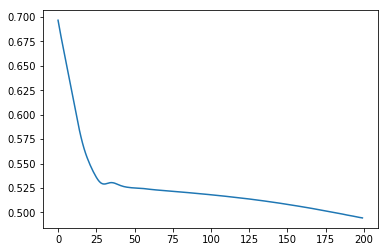

In [17]:
plt.plot(losses)

In [18]:
pred_test = net(df_test)
_, preds_y = torch.max(pred_test, 1)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_score(test_y, preds_y)

0.7142375168690959